In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations', 
                 usecols=['name', 'group', 'year', 'value'])
df.head(3)

,name,group,year,value
0,Agra,India,1575,200.0
1,Agra,India,1576,212.0
2,Agra,India,1577,224.0


In [3]:
current_year = 2018
dff = (df[df['year'].eq(current_year)]
       .sort_values(by='value', ascending=True)
       .head(10))
dff

,name,group,year,value
2537,Karachi,Asia,2018,18185.2
4327,New York,North America,2018,18713.0
1336,Dhaka,Asia,2018,19632.6
1195,Cairo,Middle East,2018,19849.6
4679,Osaka,Asia,2018,20409.0
3574,Mexico City,Latin America,2018,21520.4
5445,Sao Paulo,Latin America,2018,21697.8
3748,Mumbai,India,2018,22120.0
689,Beijing,Asia,2018,22674.2
5547,Shanghai,Asia,2018,25778.6


<BarContainer object of 10 artists>

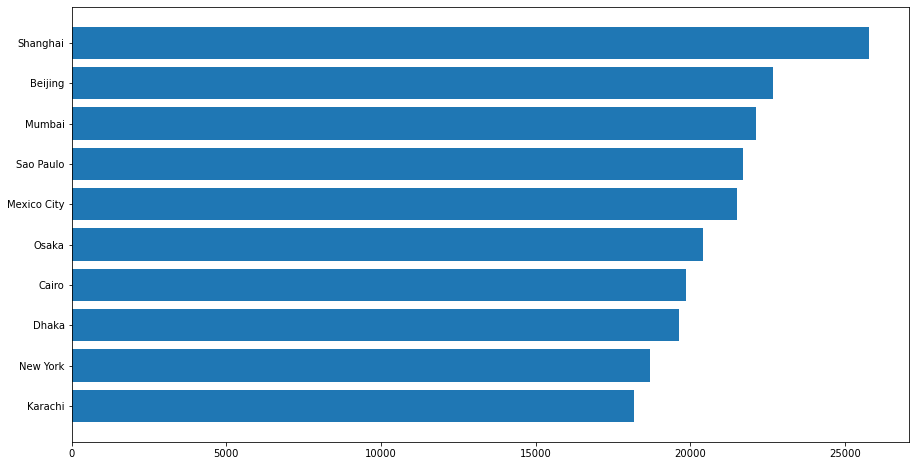

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

In [5]:
colors = dict(zip(
    ['India', 'Europe', 'Asia', 'Latin America',
     'Middle East', 'North America', 'Africa'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))
group_lk = df.set_index('name')['group'].to_dict()

Text(1, 0.4, '2018')

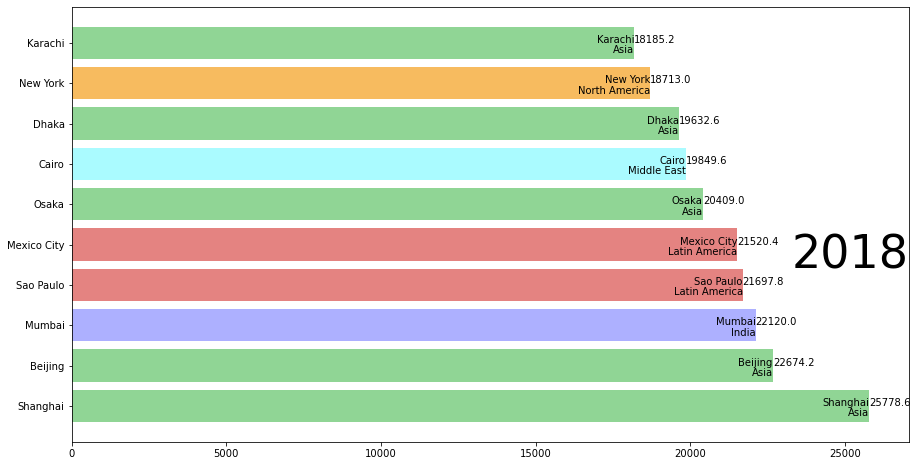

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

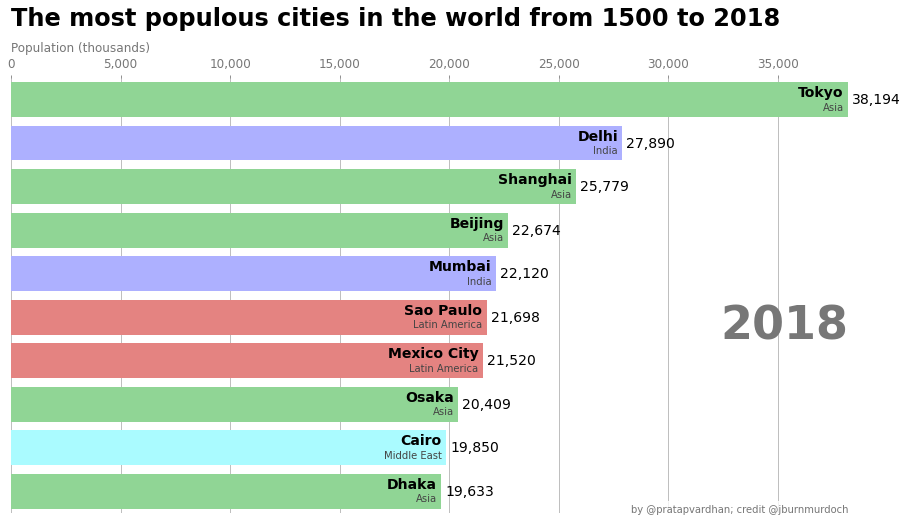

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in the world from 1500 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

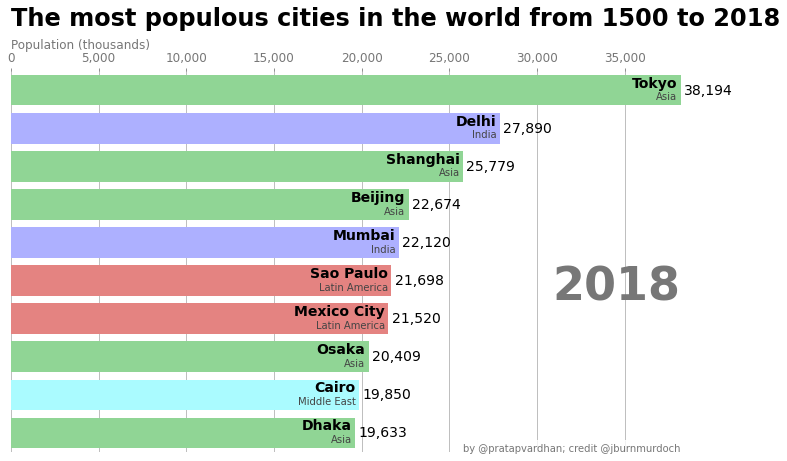

In [10]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(12, 7))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1968, 2019))
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()

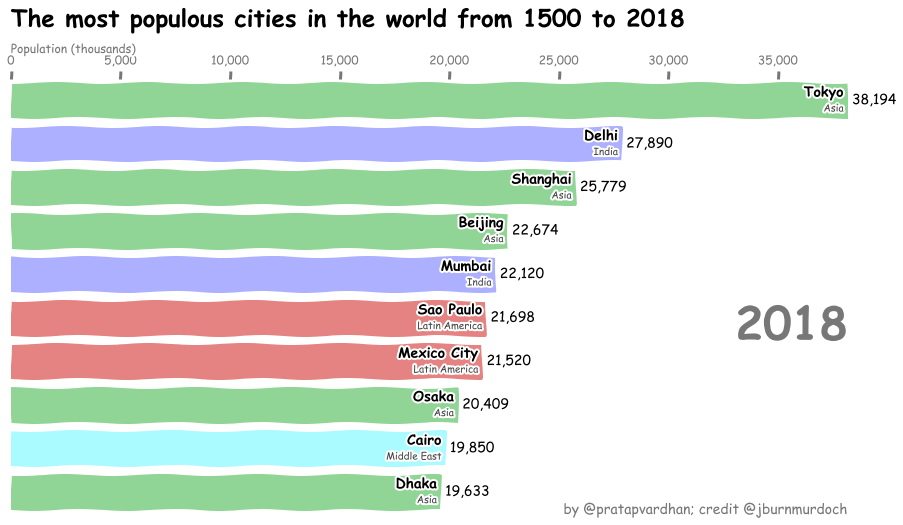

In [9]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15, 8))
    draw_barchart(2018)